In [78]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder


from tensorflow import keras
from tensorflow.keras import layers

In [79]:
df = pd.read_pickle("./mydata_1000.pkl")  

## Task
- Want to build a model to predict how many kudos I will get
- As a starter, I will build a **binary classifier** to predict whether or not the activity will get more than 5 likes
- For a v1, I will build a **random forest** classifier

<Axes: xlabel='kudos_count', ylabel='Count'>

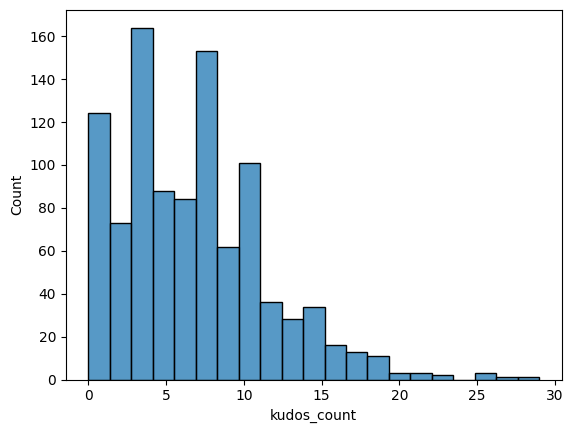

In [80]:
sns.histplot(
    data =df,
    x='kudos_count')

In [81]:
def more_than_five(kudos):
    if kudos>5:
        return 1
    else:
        return 0

df['kudos_gt5'] = df['kudos_count'].apply(more_than_five)
df['kudos_gt5'].value_counts()

kudos_gt5
1    551
0    449
Name: count, dtype: int64

## Feature Engineering
- First we identify what features we are interested in
- Need to re-format some, deal with missing values, normalize, OneHotEncode, etc.

In [82]:
df = df[['kudos_gt5','distance','moving_time','total_elevation_gain','sport_type','max_speed']]
df

,kudos_gt5,distance,moving_time,total_elevation_gain,sport_type,max_speed
0,1,11161.0,4492,147.2,TrailRun,5.500
1,1,16474.3,2157,116.0,Ride,13.062
2,1,11661.0,7937,630.2,TrailRun,4.970
3,1,26759.6,17292,852.7,TrailRun,4.444
4,1,9387.4,7042,133.9,Hike,1.775
...,...,...,...,...,...,...
195,1,6774.5,2042,93.2,Run,5.600
196,0,1353.1,490,3.0,Run,3.300
197,0,886.5,302,3.3,Run,3.800
198,1,9946.5,2839,113.3,Run,5.100


### One Hot Encoding the sport_type column

In [83]:
df['sport_type'].value_counts()

sport_type
Run               295
Rowing            257
Ride              235
WeightTraining     90
Hike               60
Swim               36
Workout            15
TrailRun           10
Walk                2
Name: count, dtype: int64

In [84]:
df_encoded = pd.get_dummies(df['sport_type'], prefix='sport', drop_first=True)
df_encoded = df_encoded.astype(int)
df = pd.concat([df, df_encoded], axis=1)
df.drop(['sport_type'], axis=1, inplace=True)
df

,kudos_gt5,distance,moving_time,total_elevation_gain,max_speed,sport_Ride,sport_Rowing,sport_Run,sport_Swim,sport_TrailRun,sport_Walk,sport_WeightTraining,sport_Workout
0,1,11161.0,4492,147.2,5.500,0,0,0,0,1,0,0,0
1,1,16474.3,2157,116.0,13.062,1,0,0,0,0,0,0,0
2,1,11661.0,7937,630.2,4.970,0,0,0,0,1,0,0,0
3,1,26759.6,17292,852.7,4.444,0,0,0,0,1,0,0,0
4,1,9387.4,7042,133.9,1.775,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,6774.5,2042,93.2,5.600,0,0,1,0,0,0,0,0
196,0,1353.1,490,3.0,3.300,0,0,1,0,0,0,0,0
197,0,886.5,302,3.3,3.800,0,0,1,0,0,0,0,0
198,1,9946.5,2839,113.3,5.100,0,0,1,0,0,0,0,0


## Train/ Test Split

In [85]:
X = df.drop('kudos_gt5', axis=1)
y = df['kudos_gt5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Re-scaling numerical columns

In [86]:
numerical_cols = ['distance','moving_time','total_elevation_gain','max_speed']
for col in numerical_cols:
    X_train.loc[:,col] = StandardScaler().fit_transform(X_train[[col]])
    X_test.loc[:,col] = StandardScaler().fit_transform(X_test[[col]])

In [87]:
X_train

,distance,moving_time,total_elevation_gain,max_speed,sport_Ride,sport_Rowing,sport_Run,sport_Swim,sport_TrailRun,sport_Walk,sport_WeightTraining,sport_Workout
29,-0.004683,0.322343,-0.382690,-1.020823,0,0,0,0,1,0,0,0
135,-0.310918,-0.289099,-0.382690,-0.298807,0,1,0,0,0,0,0,0
95,0.137360,-0.480839,-0.207587,1.044946,1,0,0,0,0,0,0,0
157,0.023946,0.148138,-0.228641,-0.166838,0,0,1,0,0,0,0,0
36,-0.637940,-0.064587,-0.382690,-1.020823,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.140604,-0.468478,-0.186533,1.139409,1,0,0,0,0,0,0,0
70,1.358673,-0.015718,-0.382690,1.265562,1,0,0,0,0,0,0,0
60,-0.637940,0.138364,-0.382690,-1.020823,0,1,0,0,0,0,0,0
35,-0.267364,-0.321007,-0.328650,-0.257090,0,0,1,0,0,0,0,0


## Neural Network

In [88]:
# Build a simple neural network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the testing data
y_pred = (model.predict(X_test) > 0.5).astype(int)


Epoch 1/10
20/20 [==============================] - 1s 13ms/step - loss: 0.6428 - accuracy: 0.5813 - val_loss: 0.6037 - val_accuracy: 0.6750
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.5923 - accuracy: 0.7047 - val_loss: 0.5710 - val_accuracy: 0.6875
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.5640 - accuracy: 0.7250 - val_loss: 0.5509 - val_accuracy: 0.6750
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.5395 - accuracy: 0.7297 - val_loss: 0.5366 - val_accuracy: 0.6938
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.5224 - accuracy: 0.7188 - val_loss: 0.5262 - val_accuracy: 0.7000
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.5053 - accuracy: 0.7406 - val_loss: 0.5236 - val_accuracy: 0.7000
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4951 - accuracy: 0.7359 - val_loss: 0.5211 - val_accuracy: 0.7312
Epoch 8/10
20/20 [=

## Evaluate Model Performance

In [89]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.67      0.67        90
           1       0.73      0.75      0.74       110

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200



In [93]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

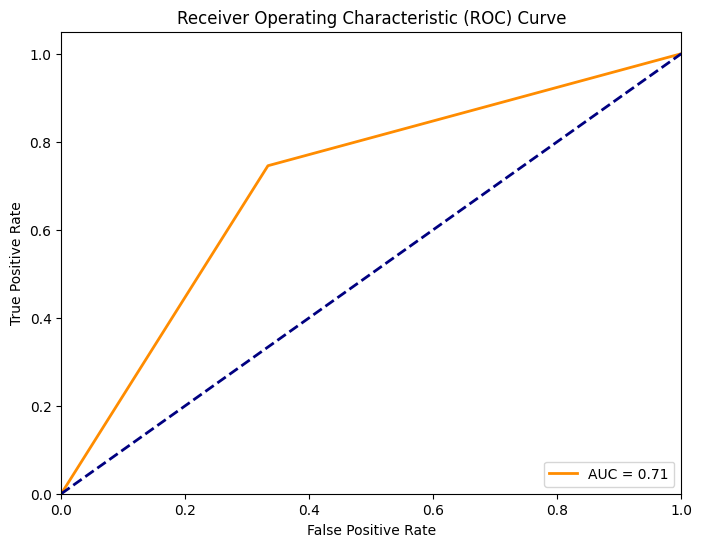

In [94]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()